In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Task
Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

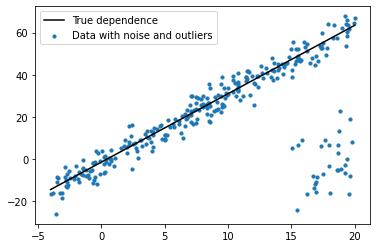

In [32]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
    x = np.random.uniform(*limits, size=N)
    y = true_function(x) + noize_function(x)
    return x[:], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

In [33]:
def mean_squared_error(y_true, y_predicted):
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

In [34]:
def gradient_descent(x, y, iterations = 150, learning_rate = 0.0001,
                     stopping_threshold = 1e-6):
     
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = 300
     
    costs = []
    weights = []
    previous_cost = None
     
    for i in range(iterations):
         
        y_predicted = (current_weight * x) + current_bias
         
        current_cost = mean_squared_error(y, y_predicted)
 
        
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)

        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
    return current_weight, current_bias
 

In [91]:
def main(X,Y):
        
    estimated_weight, eatimated_bias = gradient_descent(X, Y, iterations=150)

    Y_pred= estimated_weight*X + eatimated_bias
    plt.figure(figsize = (8,6))    
    plt.scatter(X, y, marker='o')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='black',
             markersize=10,linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    return Y_pred

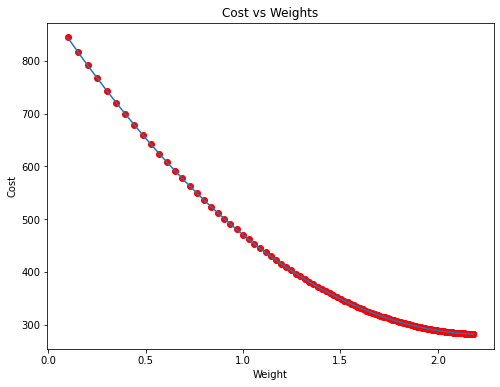

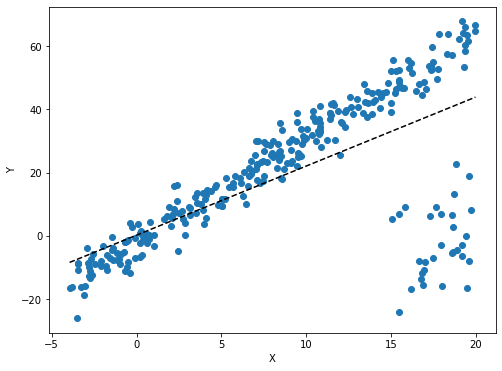

In [96]:
y_pred = main(X, y)

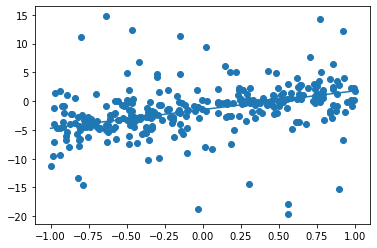

In [23]:
def linear_function(x):
  return 3.25 * x - 1.47

def gen_dataset(N, func, lims=(-1., 1.)):
  x = np.random.uniform(*lims, size=N)
  y = func(x) + noize_function(x) * np.random.normal(size=x.shape)
  return x[:,None], y

X, y = gen_dataset(300, linear_function)
x = np.linspace(-1, 1, 101)
plt.plot(x, linear_function(x))
plt.scatter(X, y);

[2.67280082] -1.418102616941666


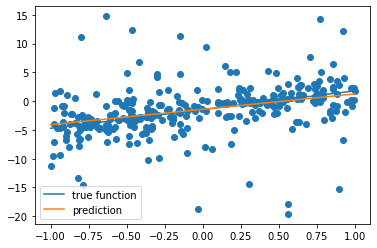

In [24]:
# The following class implements the analytical solution for
# linear regression with the MSE loss
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)

x = np.linspace(-1, 1, 300)
plt.plot(x, linear_function(x), label='true function')
plt.scatter(X, y);
plt.plot(x, model.predict(x[:,None]), label='prediction')
plt.legend()

print(model.coef_, model.intercept_)

I can notice that model with gradient descent optimization have it has a higher sensitivity to emissions.